## Занятие 4
## Математический анализ
## Анализ функции. Построение графика в matplotlib.pyplot
https://matplotlib.org

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

https://matplotlib.org/tutorials/text/annotations.html

https://matplotlib.org/gallery/recipes/centered_spines_with_arrows.html

https://matplotlib.org/gallery/pyplots/axline.html#sphx-glr-gallery-pyplots-axline-py

https://matplotlib.org/gallery/axisartist/demo_axisline_style.html#sphx-glr-gallery-axisartist-demo-axisline-style-py

https://matplotlib.org/gallery/axisartist/simple_axisline2.html#sphx-glr-gallery-axisartist-simple-axisline2-py

https://matplotlib.org/gallery/lines_bars_and_markers/markevery_demo.html#sphx-glr-gallery-lines-bars-and-markers-markevery-demo-py

https://matplotlib.org/gallery/subplots_axes_and_figures/axes_props.html#sphx-glr-gallery-subplots-axes-and-figures-axes-props-py

In [3]:
# Импорт библиотеки matplotlib.pyplot обычно осуществляется так:
import matplotlib.pyplot as plt
import sympy
import numpy as np
from sympy import Symbol, symbols, S, solve, solveset, latex
from sympy.calculus.util import continuous_domain

## Точки пересечения графика функции с осями координат
Точка пересечения с OY графика функции $f(x)$ находится подстановкой $f(0)$, так что получается точка с координатами 
$(0, f(0)$.

Точки пересечения с осью OX находятся как решения уравнения $f(x) = 0$.
### Пример 1
Найти точки пересечения графика функции $f(x) = 18x^4 + 57 x^3 - 46 x^2 - 231 x - 98$ с осями координат, построить график и отметить точки пересечения.

Вначале решим уравнение $18x^4 + 57 x^3 - 46 x^2 - 231 x - 98 = 0$, используем solve, поскольку предполагается конечное число корней, не более четырех.

In [7]:
x = Symbol('x')
def f(x):
    return 18*x**4 + 57*x**3 - 46*x**2 - 231*x - 98
roots = solve(f(x))
roots

[-7/3, -1/2, 2]

Добавим с помощью append к списку roots 0, поскольку это горизонтальная координата точки пересечения с осью OY. 

Вычислим вертикальную координату точки пересечения с осью OY:

In [6]:
point_OY = f(0)
point_OY

0.5

Построим график с помощью plot из библиотеки matplotlib.pyplot

Поскольку библиотеку подключили как

import matplotlib.pyplot as plt

то plot вызывается как plt.plot

Для построения графика нужно определить диапазон значений переменной, в нашем случае $x$, для этого можно использовать linspace из пакета numpy.
Аргументы linspace, которые нам сейчас понадобятся это диапазон значений $x$ и соответствующий диапазон значений $f(x)$. 

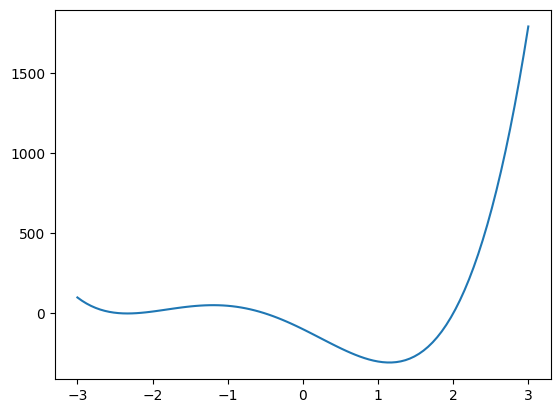

In [8]:
X = np.linspace(-3, 3, 100)
plt.plot(X, f(X))

Составим список вертикальных координат точек пересечения с осями, в нем все элементы, кроме последнего, равны нулю, 
поскольку это вертикальные координаты точек пересечения с осью OX, а последняя координата - 
вертикальная координата точки пересечения с осью OY:

In [45]:
y_coord = [0]*len(roots) 
roots.append(0)
y_coord.append(point_OY) 

Отметим на графике точки пересечения с осями, точки отмечаются с помощью scatter, в качестве аргументов передаются списки горизонтальных и вертикальных координат точек.

In [9]:
plt.scatter(roots, y_coord)

NameError: name 'y_coord' is not defined

Для того, чтобы точки и график изобразить в одной координатной плоскости в Jupyter Notebook, выполним вызовы plot и scatter в одной ячейке. Подписи к точкам можно выполнить с помощью метода annotate, только сначала нужно получить доступ к текущей системе координат, это делается с помощью метода gca. Строить график в таким случае следует ax.plot(X, f(X)), а не plt.plot(X, f(X)), чтобы не смешивать стили.

Для лучшего понимания написаны комментарии, хотя при написании программ в реальной жизни так делать не нужно.

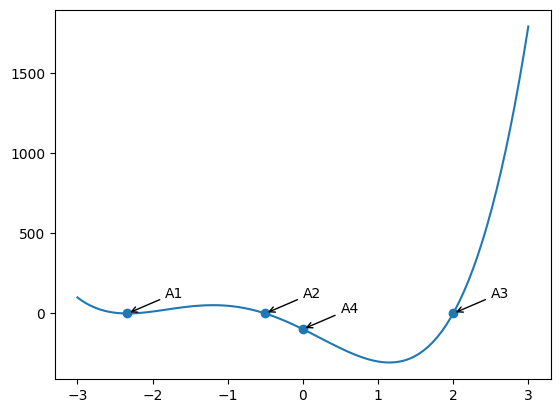

In [47]:
ax = plt.gca() # get current axes - получить текущую систему координат
ax.plot(X, f(X))
ax.scatter(roots, y_coord)
for i, x_coord in enumerate(roots): # Чтобы не писать много раз один длинный код, сделаем подписи в цикле
    ax.annotate('A' + str(i + 1),
                xy=(x_coord, y_coord[i]), # Координаты подписываемой точки, туда ведет стрелка
                xytext=(x_coord + 0.5, y_coord[i] + 100), # Координаты текста подписи, смещены от точки
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), # Описание стрелки
                ) # Скобка на отдельной строчке, чтобы было видно, что скобки сбалансированы, это делать не обязательно

Обычно используется такое изображение координатной плоскости, при котором график находится в прямоугольной рамке, левая сторона которой отражает масштаб по вертикальной оси, а нижняя - по горизонтальной.

Если нужно получить "русский" вариант расположения координатных осей, можно сделать так:

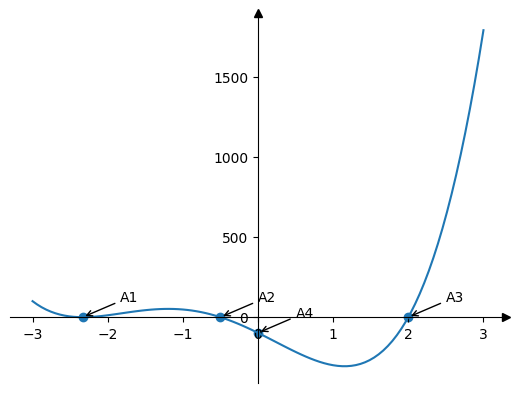

In [48]:
ax = plt.gca() 
for i, x_coord in enumerate(roots): 
    ax.annotate('A' + str(i + 1),
            xy=(x_coord, y_coord[i]), xycoords='data',
            xytext=(x_coord + 0.5, y_coord[i] + 100), textcoords='data', 
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3")) 
ax.spines['right'].set_color('none') # Правая сторона рамки стала бесцветной, но не исчезла!
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0)) # Нижняя сторона рамки переместилась в начало координат
ax.spines['left'].set_position(('data', 0))    
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.plot(X, f(X))
ax.scatter(roots, y_coord)

## Построение асимптот
#### Асимптота графика функции 
прямая, такая, что расстояние от точки графика функции до этой прямой стремится к нулю при удалении точки в бесконечность.

Вертикальная асимптота - прямая $x=x_0$, где $x_0$ - точка разрыва функции, разрыв I или II рода.

Горизонтальная асимптота - прямая $y=y_0$, где $y_0=\lim\limits_{x\to\infty}f(x)$

Наклонная асимптота - прямая $y=kx+b$, где $k=\lim\limits_{x\to\infty}\frac{f(x)}{x}$, $b=\lim\limits_{x\to\infty}(f(x)-kx)$, если оба предела существуют и конечны.
### Пример 2.
Найдем асимптоты графика функции $f(x)=\frac{3x^2-2x-1}{x-2}$
и построим график.

Вначале найдем нули знаменателя (вертикальные асимптоты) с помощью solveset; используем fraction, чтобы выделить числитель и знаменатель дроби:

In [10]:
def f(x):
    return (3*x**2 - 2*x - 1)/(x - 2)
fnum, fdenom = sympy.fraction(f(x)) 
v_as = sympy.solve(fdenom, x) 
v_as

[2]

## limit
Для вычисления пределов в Sympy есть limit, можно использовать как функцию или как метод. Вначале покажем, как использовать 
limit как функцию с аргументами имя функции, имя аргумента функции, предельная точка (или бесконечность). 
Вычислим пределы функции на бесконечности:

In [11]:
y0pos = sympy.limit(f(x), x, +sympy.oo)
y0neg = sympy.limit(f(x), x, -sympy.oo)
y0pos, y0neg

(oo, -oo)

Теперь используем limit как метод:

In [12]:
y0pos = f(x).limit(x, +sympy.oo)
y0neg = f(x).limit(x, -sympy.oo)
y0pos, y0neg

(oo, -oo)

Оба предела бесконечные, горизонтальных асимптот нет

Ищем наклонные асимптоты:

In [13]:
kpos = sympy.limit(f(x)/x, x, +sympy.oo)
kneg = sympy.limit(f(x)/x, x, -sympy.oo)
if kpos == kneg:
    k = kpos
else:
    k = (kneg, kpos)
k

3

В нашем случае возможна лишь одна наклонная асимптота. Вычисляем предел $\lim_{x\to\infty}(f(x) - kx)$

In [14]:
b = sympy.limit(f(x) - k*x, x, sympy.oo)
b

4

$b < \infty$, следовательно, $y = 3x + 4$ - наклонная асимптота.

In [15]:
y_as = k*x + b
display(y_as)

3*x + 4

Строим график функции и асимптот. Поскольку наклонная асимптота задана своей формулой, т.е. выражением expression, то для подстановки значений аргумента воспользуемся subs. Альтернатива - задать асимптоту функцией и подставлять значения $x$ как обычно подставляют аргументы в функцию.

Для того, чтобы вертикальная асимптота не получилась "автоматически" и тем же цветом, что график функции (подумайте, почему?), разобъем график на две независимые части (X1, Y1) и (X2, Y2).

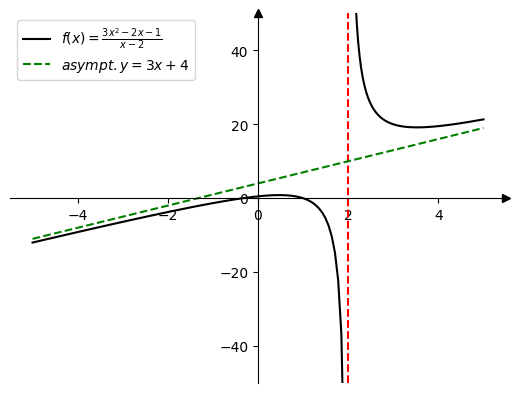

In [34]:
minY = -50  
maxY = 50
ax = plt.gca()
ax.set(ylim=(minY, maxY))
for item in v_as:
    ax.axvline(x=item, color='red', linestyle='--')    
X1 = np.linspace(-5, float(item - 0.01), 100) 
X2 = np.linspace(float(item + 0.01), 5, 100)
Y1 = f(X1)
Y2 = f(X2)
ax.plot(X1, Y1, 'k-', label=r'$f(x)=' + sympy.latex(f(x)) + r'$') # График левой ветви функции
ax.plot(X2, Y2, 'k-') # График правой ветви функции
ax.plot([X1[0], X2[-1]], [y_as.subs(x, X1[0]), y_as.subs(x, X2[-1])], 'g--', 
         label=r'$asympt. y=' + sympy.latex(y_as) + r'$')# График наклонной асимптоты
ax.legend(loc='best')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, "k>", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "k^", transform=ax.get_xaxis_transform(), clip_on=False)

### Пример 3.
Построим график периодической функции $f(x) = 2 tg(3x)$.
Нам понядобятся как аналитические преобразования, так и численные, поэтому нужно будет обращаться к тангенсу и из Sympy, и из Numpy. Для удобства введем необязательный параметр lib, по умолчанию равный "sympy".

In [42]:
x = Symbol('x')
def f(x, lib='sympy'):
    if lib == 'sympy':
        tg = sympy.tan
    elif lib == 'numpy':
        tg = np.tan
    else:
        return 'Wrong library name, only sympy or numpy is allowed'
    return 2*tg(3*x)   

#### Область определения функции.
Можно использовать continuous_domain из sympy.calculus.util.

from sympy.calculus.util import continuous_domain  

в начале файла написали именно для того, чтобы сейчас использовать. 

In [57]:
display(continuous_domain(f(x), x, S.Reals))

Complement(Reals, Union(ImageSet(Lambda(_n, 2*_n*pi/3 + pi/6), Integers), ImageSet(Lambda(_n, 2*_n*pi/3 + pi/2), Integers)))

#### Четность функции.
Проверим выполнение $f(-x) = f(x)$ или $f(-x) = - f(x)$:

In [58]:
f(x) == f(-x), f(x) == - f(-x)

(False, True)

Данная функция нечетная.
#### Периодичность функции.
Проверим выполнение $f(x + T) = f(x)$ при $T = \pi/3$:

In [44]:
f(x + sympy.pi/3) == f(x)

True

Функция периодична с периодом $T = \pi/3$.
#### Вертикальные асимптоты.
У функции есть точки разрыва, вычислим пределы в одной из них, для вычисления предела слева изменим значение по умолчанию '+' необязательного аргумента dir на '-':

In [60]:
lim_pi_3_left = f(x).limit(x, sympy.pi/6, dir='-')
lim_pi_3_right = f(x).limit(x, sympy.pi/6)
print(lim_pi_3_left, lim_pi_3_right)

oo -oo


Пределы бесконечные, значит, точка разрыва является вертикальной асимптотой.
Из периодичности следует, что остальные точки разрыва тоже являются асимптотами.

Используем 

ylim для того, чтобы установить пределы по оси OY,

title для названия графика,

legend для показа легенды,

xticks для отметок по горизонтальной оси в точках вида $-\pi/3 + \pi n/6$, $n$ целое от 0 до 4.

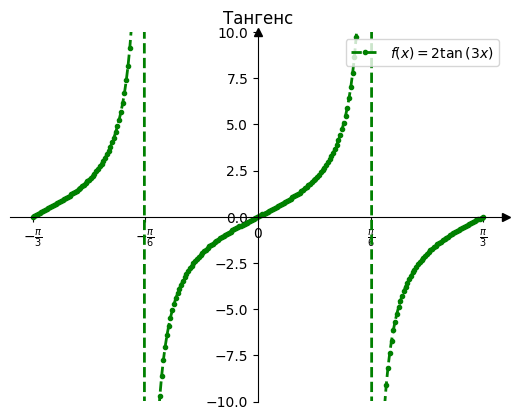

In [61]:
X = np.linspace(-np.pi/3, np.pi/3, 256)
Y = f(X, lib='numpy')
ax = plt.gca()  
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.set_ylim(-10, 10)
ax.set_title(r'Тангенс')
ax.set_xticks([-np.pi/3 + np.pi*n/6 for n in range(5)])
ax.set_xticklabels([r'$' + latex(- sympy.pi/3 + sympy.pi*n/6) + r'$' for n in range(5)]) 
ax.plot(X, Y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=3, 
         label=r'$f(x) = ' + latex(f(x)) + '$')
# Альтернативный вариант записи - сокращенный, можно использовать любой, но столько не смешивать!
# ax.plot(x, y, 'go--', linewidth=2, markersize=3, label=r'$'+latex(f(x))+'$')
ax.legend(loc='upper right')